<a href="https://colab.research.google.com/github/LuisPauleto/CBS_analyse/blob/main/report_CBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Pacotes Utilizados

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### Extração

In [ ]:
df_receitas = pd.read_excel("/content/drive/MyDrive/Relatorio_de_receitas_e_matricula.xlsx")

In [ ]:
len(df_receitas)

1311

In [ ]:
df_receitas.head(10)

,Unnamed: 0,Data,Descrição,Valor,Tipo,mensalidade,receita
0,37,2023-02-01,#CLIENTE#23001,367.73,Crédito,367.73,0.00
1,115,2023-03-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
2,194,2023-04-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
3,279,2023-05-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
4,358,2023-06-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
5,438,2023-07-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
6,516,2023-08-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
7,603,2023-09-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
8,698,2023-10-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73
9,789,2023-11-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73


#### Transformações

In [ ]:
# Dropar a coluna Unnamed
df_receitas.drop(columns = ['Unnamed: 0'], inplace=True)

In [ ]:
# Filtrar apenas os clientes (formato #CLIENTE...)
df_receitas['is_client'] = df_receitas['Descrição'].str.contains('#CLIENTE#\d*', regex=True)

In [ ]:
len(df_receitas[df_receitas['is_client']==False])

13

In [ ]:
df_receitas[df_receitas['is_client']==False].head(13)

,Data,Descrição,Valor,Tipo,mensalidade,receita,is_client
1298,2023-12-01,Aluguel de sala,750.00,Dinheiro,750.00,0.00,False
1299,2024-01-21,Aluguel de sala,750.00,Dinheiro,0.00,750.00,False
1300,2023-01-19,Depósito,375.26,Aporte pessoal,375.26,0.00,False
1301,2023-06-14,Depósito,146.87,Aporte pessoal,0.00,146.87,False
1302,2023-07-19,Espetáculo de Inverno,6948.14,Espetáculo,6948.14,0.00,False
1303,2023-12-26,Espetáculo de fim de ano,21213.05,Espetáculo,21213.05,0.00,False
1304,2023-02-28,Rendimentos conta Mercado Pago,44.18,Investimento,44.18,0.00,False
1305,2023-03-31,Rendimentos conta Mercado Pago,37.44,Investimento,0.00,37.44,False
1306,2023-02-28,Venda de Uniforme,734.63,Dinheiro,734.63,0.00,False
1307,2023-03-01,Venda de Uniforme,140.00,Dinheiro,0.00,140.00,False


In [ ]:
# Excluir essas linhas
df_receitas = df_receitas.loc[df_receitas["is_client"] == True]

In [ ]:
len(df_receitas)

1298

In [ ]:
df_receitas.drop(columns = 'is_client', inplace=True)

Agora temos apenas clientes no campo "Descrição"

#### Análise: alunos por mês (2023 - 2024)

In [ ]:
df_receitas.groupby(["Descrição"]).count()['mensalidade']

Descrição
#CLIENTE#23001    15
#CLIENTE#23002    16
#CLIENTE#23003    16
#CLIENTE#23004    12
#CLIENTE#23005     9
                  ..
#CLIENTE#24025     1
#CLIENTE#24026     1
#CLIENTE#24027     2
#CLIENTE#24028     2
#CLIENTE#24029     1
Name: mensalidade, Length: 143, dtype: int64

In [ ]:
df_receitas.dtypes

Data           datetime64[ns]
Descrição              object
Valor                 float64
Tipo                   object
mensalidade           float64
receita               float64
dtype: object

In [ ]:
df_receitas['Data'] = df_receitas['Data'].dt.strftime('%Y-%m')

Agrupar clientes por ano e mês:

In [ ]:
df_receitas.groupby("Data").count()['mensalidade']

Data
2023-01    36
2023-02    76
2023-03    77
2023-04    84
2023-05    79
2023-06    79
2023-07    76
2023-08    87
2023-09    94
2023-10    91
2023-11    87
2023-12    82
2024-01    86
2024-02    87
2024-03    88
2024-04    89
Name: mensalidade, dtype: int64

In [ ]:
query = df_receitas.groupby("Data").count().reset_index()

Vamos visualizar esses dados graficamente:

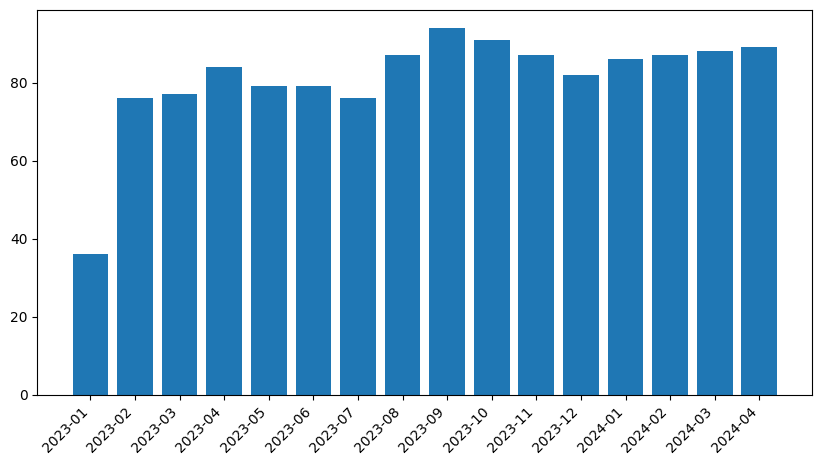

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(x = query['Data'], height = query['mensalidade'])
plt.xticks(rotation=45, ha='right');

#### Análise: Faturamento por mês

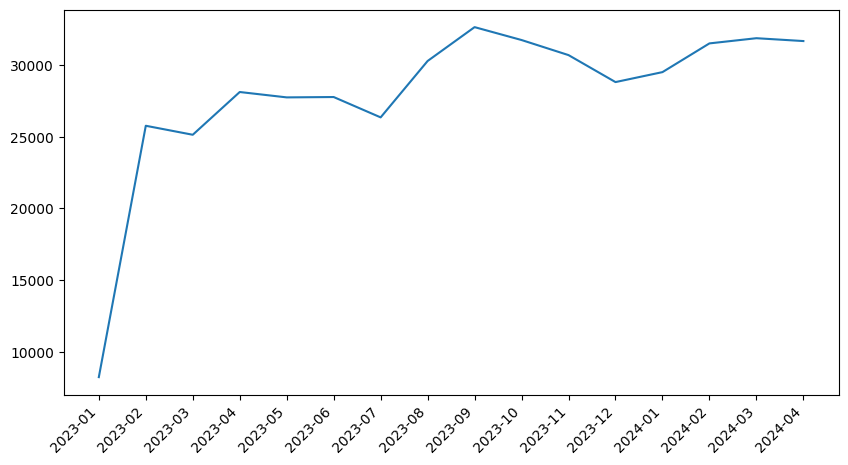

In [ ]:
query = df_receitas.groupby("Data").agg({'Valor': 'sum'})

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(query.index, query['Valor'])
plt.xticks(rotation=45, ha='right');

#### Base CRM -  Análise Funil

In [ ]:
df_CRM = pd.read_excel("/content/drive/MyDrive/CRM - CBS Dance Factory 2023 e 2024.xlsx")

In [ ]:
df_CRM.head()

,CRM - Gerenciamento de Relacionamento com o Cliente,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,NaN
1,1,2022-01-07 00:00:00,Graziele,22,12 99614-0592,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaN,18h30,ALISSON,SIM,NaN,MATRICULADO,NaN,NaN
2,2,2022-01-07 00:00:00,Camila,ADULTO,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaN,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN
3,3,2021-01-05 00:00:00,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN,NaN
4,4,2021-01-05 00:00:00,ENIALE RAMOS QUINTINO (MÃE ELAINE),11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaN,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN,NaN


#### Transformações da base CRM

Correção da header

In [ ]:
header = df_CRM.iloc[0]
df_CRM = df_CRM[1:]
df_CRM.columns = header

In [ ]:
df_CRM.head()

,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,NaN
1,1,2022-01-07 00:00:00,Graziele,22,12 99614-0592,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,NaN,18h30,ALISSON,SIM,NaN,MATRICULADO,NaN,NaN
2,2,2022-01-07 00:00:00,Camila,ADULTO,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaN,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN
3,3,2021-01-05 00:00:00,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN,NaN
4,4,2021-01-05 00:00:00,ENIALE RAMOS QUINTINO (MÃE ELAINE),11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaN,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN,NaN
5,5,2022-01-07 00:00:00,Bia,ADULTO,12 98129-7939,INFORMAÇÕES,WHATSAPP,MODALIDADES,NaN,-,-,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN


Vamos eliminar algumas colunas irrelevantes para essa análise

In [ ]:
df_CRM.drop(columns = ['OBSERVAÇÕES',
                       'REAGENDAMENTO',
                       'PROFESSOR',
                       'HORÁRIO',
                       'DATA AGENDAMENTO',
                       'TELEFONE',
                       'NOME COMPLETO',
                       'QTDE'
                       ], inplace = True)

In [ ]:
# Eliminar a coluna "NaN"
df_CRM = df_CRM.iloc[:, 0:7]

In [ ]:
df_CRM.head()

,DATA 1º CONTATO,IDADE,STATUS,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
1,2022-01-07 00:00:00,22,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,SIM,MATRICULADO
2,2022-01-07 00:00:00,ADULTO,INFORMAÇÕES,WHATSAPP,JAZZ,NÃO,SEMANA SOLIDÁRIA
3,2021-01-05 00:00:00,16,AULA EXPERIMENTAL,WHATS,K-POP,NÃO FICOU,NÃO RESPONDE
4,2021-01-05 00:00:00,11,AULA EXPERIMENTAL,WHATS,JAZZ,MATRICULADO,MATRICULADO
5,2022-01-07 00:00:00,ADULTO,INFORMAÇÕES,WHATSAPP,MODALIDADES,NÃO,SEMANA SOLIDÁRIA


In [ ]:
df_CRM.shape

(1679, 7)

1679 linhas

In [ ]:
df_CRM.nunique()

0
DATA 1º CONTATO    535
IDADE               93
STATUS              10
VIA                 13
ESTILOS             49
COMPARECEU          56
SITUAÇÃO           232
dtype: int64

In [ ]:
df_CRM.groupby('STATUS').count()

,DATA 1º CONTATO,IDADE,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
STATUS,,,,,,
AULA AVULSA,3,3,3,3,3,3
AULA ESPERIMENTAL,1,1,1,1,1,1
AULA EXPERIMENTAL,891,869,891,891,880,878
CAPTAÇÃO,62,59,62,62,62,62
COREOGRAFIA,1,1,1,1,1,1
INFORMACOES,1,1,1,1,1,1
INFORMAÇOES,1,1,1,1,1,1
INFORMAÇÃO,1,1,1,1,1,1
INFORMAÇÕES,709,494,709,705,705,702


Como podemos ver, há várias linhas que representam a mesma coisa (informação). Vamos padronizar isso para "INFORMAÇÕES" e "AULA EXPERIMENTAL"

In [ ]:
for i in ['INFORMACOES', 'INFORMAÇOES', 'INFORMAÇÃO']:
  df_CRM['STATUS'] = df_CRM['STATUS'].str.replace(i, 'INFORMAÇÕES')

In [ ]:
df_CRM['STATUS'] = df_CRM['STATUS'].str.replace('INFORMAÇÕES ', 'INFORMAÇÕES')

In [ ]:
df_CRM['STATUS'] = df_CRM['STATUS'].str.replace('AULA ESPERIMENTAL', 'AULA EXPERIMENTAL')

In [ ]:
df_CRM.groupby('STATUS').count()

,DATA 1º CONTATO,IDADE,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
STATUS,,,,,,
AULA AVULSA,3,3,3,3,3,3
AULA EXPERIMENTAL,892,870,892,892,881,879
CAPTAÇÃO,62,59,62,62,62,62
COREOGRAFIA,1,1,1,1,1,1
INFORMAÇÕES,715,500,715,711,711,708


In [ ]:
df_CRM.groupby('SITUAÇÃO').count()

,DATA 1º CONTATO,IDADE,STATUS,VIA,ESTILOS,COMPARECEU
SITUAÇÃO,,,,,,
-,13,13,13,13,13,13
"2 ANOS DE IDADE, MUITO PEQUENA PRA AULA.",1,1,1,1,1,1
2º SEMESTRE,3,3,3,3,3,3
"ADOROU, VAI FECHAR EM AGOSTO!",1,1,1,1,1,1
AGENDADO,28,28,28,28,28,24
...,...,...,...,...,...,...
VEIO 19/07 - vai pensar e retorna,1,1,1,1,1,1
VEIO 23/06 - NÃO VAI FICAR,2,1,2,2,2,2
VEIO 27/08,1,1,1,1,1,1


Como a granularidade está muito pequena para a coluna 'SITUAÇÃO' (há 232 valores distintos), vou utilizar a coluna 'STATUS' para fazer a análise de funil.

In [ ]:
funil = df_CRM.groupby('STATUS').count()['VIA'].sort_values(ascending=False).head(10)

In [ ]:
funil

STATUS
AULA EXPERIMENTAL    892
INFORMAÇÕES          715
CAPTAÇÃO              62
AULA AVULSA            3
COREOGRAFIA            1
Name: VIA, dtype: int64

In [ ]:
topo_funil = funil['AULA EXPERIMENTAL']
meio_funil = funil['INFORMAÇÕES']
fundo_funil = funil['CAPTAÇÃO']

In [ ]:
df_funil = pd.DataFrame({'Labels': ['AULA EXPERIMENTAL','INFORMAÇÕES','CAPTAÇÃO'],\
                         'Values': [topo_funil, meio_funil, fundo_funil]\
                         })

In [ ]:
df_funil.head()

,Labels,Values
0,AULA EXPERIMENTAL,892
1,INFORMAÇÕES,715
2,CAPTAÇÃO,62


Plot funil

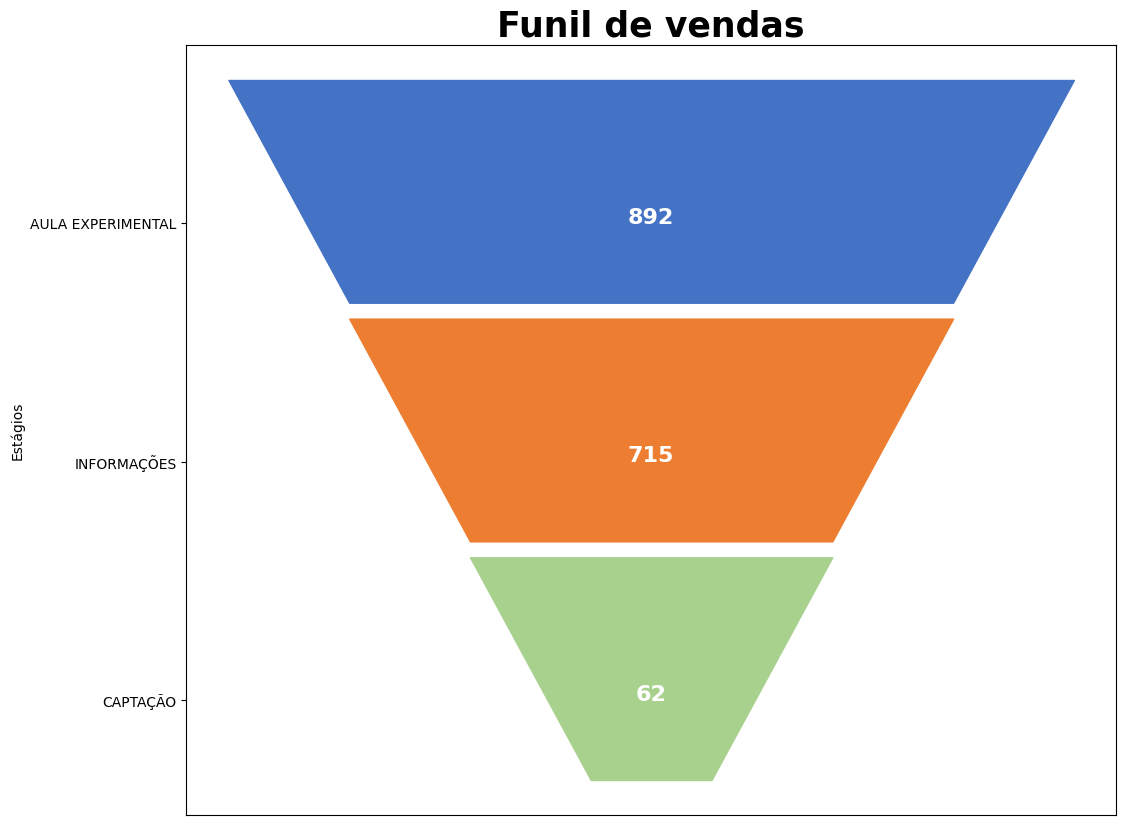

In [ ]:
colors = ["#a9d18e", "#ed7d31", "#4472c4"]

fig = plt.figure(figsize=(12,10))

plt.fill_betweenx(y=[1, 3.8], x1=[10,12], x2=[8,6], color=colors[0]);
plt.fill_betweenx(y=[4, 6.8], x1=[12,14], x2=[6,4], color=colors[1]);
plt.fill_betweenx(y=[7, 9.8], x1=[14,16], x2=[4,2], color=colors[2]);

plt.xticks([],[]);
plt.yticks([2,5,8], df_funil["Labels"][::-1]);

for y, value in zip([2,5,8], df_funil["Values"][::-1]):
    plt.text(9, y, value, fontsize=16, fontweight="bold", color="white", ha="center");

plt.ylabel("Estágios");
plt.title("Funil de vendas", loc="center", fontsize=25, fontweight="bold");